# Notebook error analysis 

## Select interesting exception types for further analysis based on crash-related ML libraries

lib-exception relationship  -  the selected (from kaggle) popular libs + on filtered nbs(that use the selected libraries)

#### Selection criterion (Revised):
To select the error types to investigate deeper (higher percentages of using the most popular ML libraries)

1. exclude exception types: nameerror, keyboardinterrupt, modulenotfounderror, filenotfounderror, importerror, oserror, memoryerror, ioerror, unicodeerror.

2. <strike>total amount of the library errors in each exception type needs to be greater than 400, or, >=80% of the errors in each exception type are from the library list<strike>

    <strike>400 is for meaningful clustering<strike>
        
    <strike>80% is for meaningful manual inspect without clustering techniques<strike>
    
2. Plot __#library errors vs. exception types__ and __%library errors vs. exception types__
        
    Select based on __elbow points__

## 1. GitHub errors

exception selection based on criterion

In [1]:
import pandas as pd
import util

path_err_nbs = r"C:\Users\yirwa29\Downloads\Dataset-Nb"
df2_err = pd.read_excel(path_err_nbs+"/nberror_g_all_p6.xlsx")

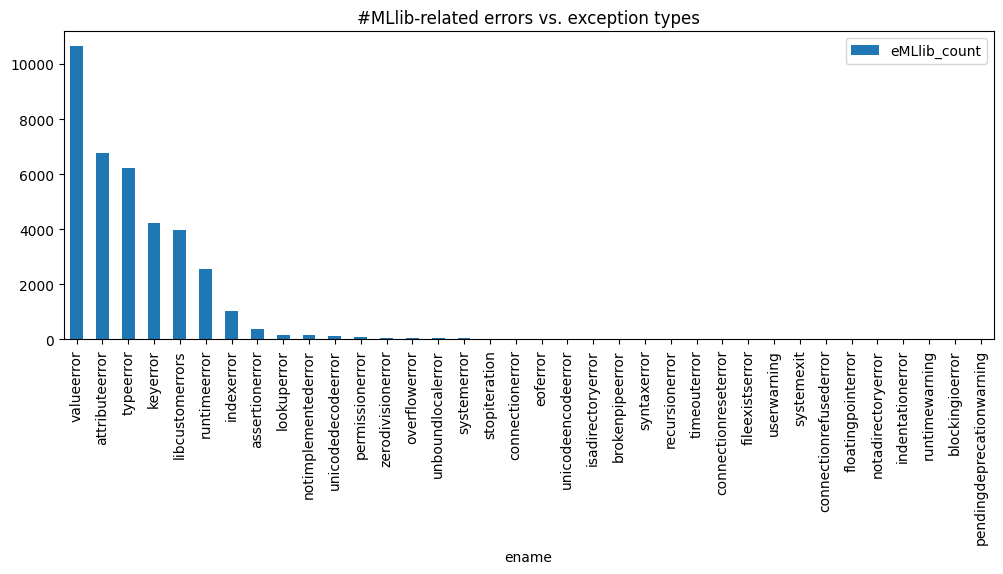

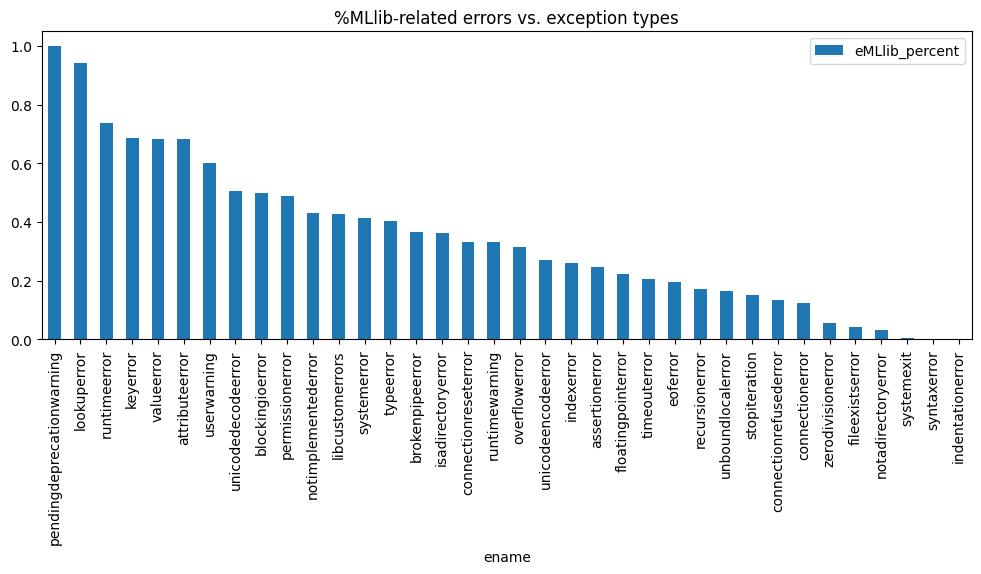

(                        ename  eMLlib_count
 0                  valueerror         10652
 1              attributeerror          6768
 2                   typeerror          6233
 3                    keyerror          4227
 4             libcustomerrors          3967
 5                runtimeerror          2561
 6                  indexerror          1012
 7              assertionerror           391
 8                 lookuperror           146
 9         notimplementederror           144
 10         unicodedecodeerror           132
 11            permissionerror            74
 12          zerodivisionerror            55
 13              overflowerror            47
 14          unboundlocalerror            45
 15                systemerror            36
 16              stopiteration            29
 17            connectionerror            24
 18                   eoferror            14
 19         unicodeencodeerror            13
 20          isadirectoryerror            12
 21       

In [2]:
util.visulize_exps_MLlibs(df2_err)

In [15]:
util.select_builtin_exps(df2_err)

Selected exception types that meet the criterions:

valueerror(15570), 68.41%(10652) are with the top libraries, top 3:
	pandas               2360 samples
	sklearn              2336 samples
	numpy                2167 samples
typeerror(15444), 40.36%(6233) are with the top libraries, top 3:
	numpy                2202 samples
	pandas               1527 samples
	torch                 821 samples
attributeerror(9922), 68.21%(6768) are with the top libraries, top 3:
	pandas               1755 samples
	numpy                1684 samples
	torch                1119 samples
libcustomerrors(9296), 42.67%(3967) are with the top libraries, top 3:
	tensorflow           1385 samples
	pandas                848 samples
	numpy                 671 samples
keyerror(6167), 68.54%(4227) are with the top libraries, top 3:
	pandas               3662 samples
	numpy                 290 samples
	tensorflow             62 samples
indexerror(3903), 25.93%(1012) are with the top libraries, top 3:
	numpy            

In [31]:
# printing tracebacks for certain exception type + related to selected libraries
import util

n = 10
print_ename = "runtimeerror"
print_tb = df2_err["traceback"][(df2_err["ename"]==print_ename)&any(df2_err["lib_parsed"].isin(config.top_lib_names))]
n = min(n,len(print_tb))
for i in range(n):
    util.print_traceback(print_tb.iloc[i])

---------------------------------------------------------------------------
RuntimeError                              Traceback (most recent call last)
<timed eval> in <module>

<ipython-input-36-8f18ffca7336> in train_bert(model, train_loader, epochs)
     28             epoch_loss += loss
     29 
---> 30             loss.backward()
     31             torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)  # Gradient clipping is not in AdamW anymore (so you can use amp without issue)
     32             optimizer.step()

~/cs224u/venv/lib/python3.6/site-packages/torch/tensor.py in backward(self, gradient, retain_graph, create_graph)
    164                 products. Defaults to ``False``.
    165         """
--> 166         torch.autograd.backward(self, gradient, retain_graph, create_graph)
    167 
    168     def register_hook(self, hook):

~/cs224u/venv/lib/python3.6/site-packages/torch/autograd/__init__.py in backward(tensors, grad_tensors, retain_graph, create_graph,

## 2. Kaggle errors

exception selection based on criterion

In [4]:
import pandas as pd
import util

path_err_nbs = r"C:\Users\yirwa29\Downloads\Dataset-Nb\nbdata_k_error"
df_err = pd.read_excel(path_err_nbs+"/nberror_k_p5.xlsx")

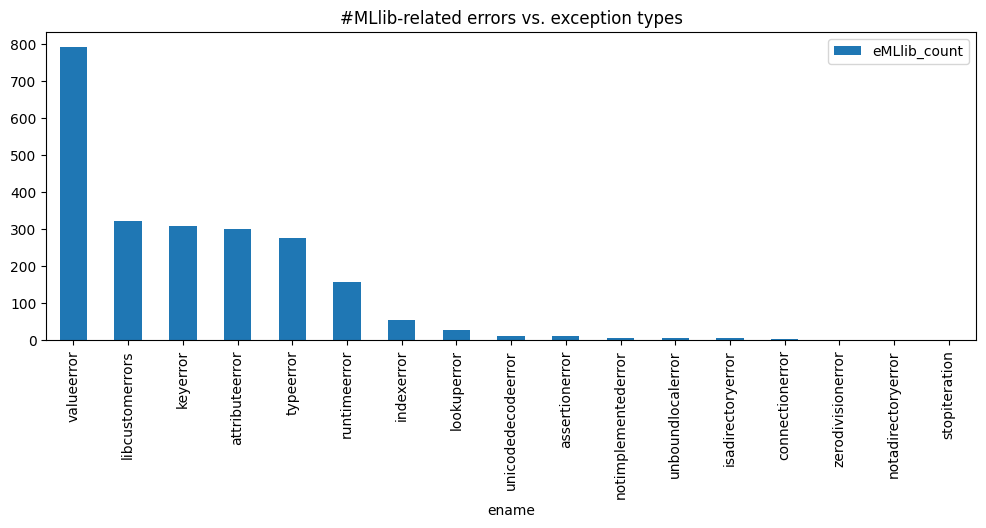

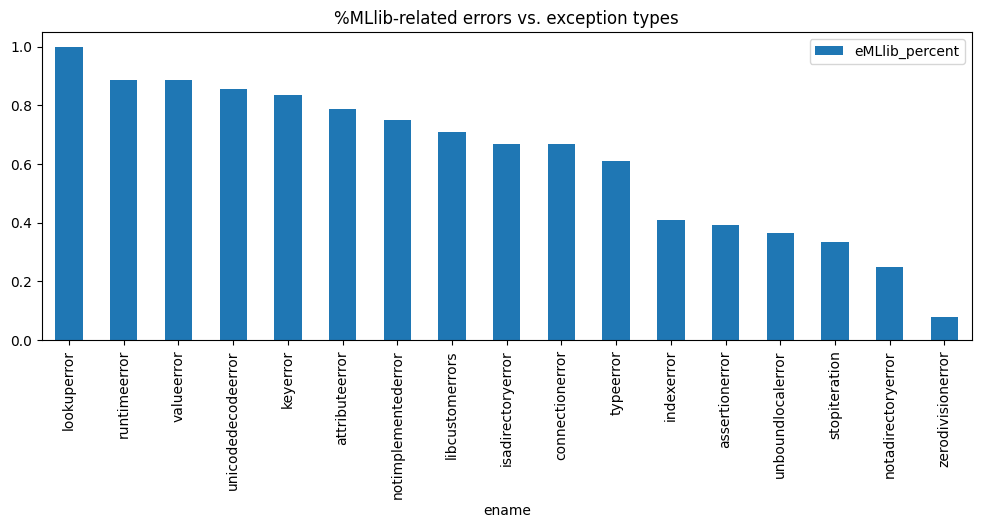

(                  ename  eMLlib_count
 0            valueerror           793
 1       libcustomerrors           322
 2              keyerror           307
 3        attributeerror           299
 4             typeerror           277
 5          runtimeerror           156
 6            indexerror            53
 7           lookuperror            26
 8    unicodedecodeerror            12
 9        assertionerror            11
 10  notimplementederror             6
 11    unboundlocalerror             4
 12    isadirectoryerror             4
 13      connectionerror             2
 14    zerodivisionerror             1
 15   notadirectoryerror             1
 16        stopiteration             1,
                   ename  eMLlib_percent
 0           lookuperror        1.000000
 1          runtimeerror        0.886364
 2            valueerror        0.885045
 3    unicodedecodeerror        0.857143
 4              keyerror        0.836512
 5        attributeerror        0.788918
 6   notim

In [5]:
util.visulize_exps_MLlibs(df_err)

In [1]:
# lib-exception relationship  -  popular libs + on filtered nbs(that use the selected libraries)
import pandas as pd
import util

path_err_nbs = r"C:\Users\yirwa29\Downloads\Dataset-Nb\nbdata_k_error"
df_err = pd.read_excel(path_err_nbs+"/nberror_k_p5.xlsx")
util.select_builtin_exps(df_err)

Selected exception types that meet the criterions:

valueerror(896), 88.50%(793) are with the top libraries, top 3:
	tensorflow            189 samples
	sklearn               187 samples
	pandas                165 samples
keyerror(367), 83.65%(307) are with the top libraries, top 3:
	pandas                254 samples
	numpy                  36 samples
	sklearn                 4 samples
runtimeerror(176), 88.64%(156) are with the top libraries, top 3:
	torch                 107 samples
	transformers           23 samples
	numpy                  19 samples
lookuperror(26), 100.00%(26) are with the top libraries, top 2:
	nltk                   25 samples
	torch                   1 samples
unicodedecodeerror(14), 85.71%(12) are with the top libraries, top 2:
	pandas                 11 samples
	tensorflow              1 samples

In total, 5 exception types are selected for further analysis


In [130]:
import util

for i in range(90,100):
    util.print_traceback(df_err[df_err.lib.isnull()].traceback.iloc[i])

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
Cell In[70], line 3
      1 inputs = Input((input_shape))
      2 # convolutional layers
----> 3 conv_1 = conv2D(32, kernel_size=(3, 3),activation='relu') (inputs)
      4 maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
      5 conv_2 = conv2D(64, kernel_size=(3, 3),activation='relu') (maxp_1)

NameError: name 'conv2D' is not defined
---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
Cell In[71], line 3
      1 #plot the model
      2 from tensorflow.keras.utils import plot_model
----> 3 plot_model(model)

NameError: name 'model' is not defined
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[19], line 15
      1 image_gen = Im